# 数値解法
常微分方程式の初期値問題の近似解をコンピュータを用いて数値計算から求める方法について考える．通常，微分方程式の解析解を得ることは困難であり，実際の場面では微分方程式の近似解をコンピュータを用いて求めることの方が一般的である．ここでは，常微分方程式における初期値問題の数値的解法であるオイラー法，ホイン法，中点法，ルンゲ・クッタ法のための数値解法の大枠について説明する．

## 常微分方程式のための数値解法
一階微分方程式における初期値問題は一般的に次のような形式を持っていた．

$$
\begin{align}
\frac{d x}{d t}=f(x, t), x(0)=\alpha
\end{align}
$$

ここで，独立変数は時刻 $t$ であり，微分方程式の初期値問題を解くとは与えられた方程式と初期条件 $x(t=0)=\alpha$ を満たす未知関数 $x=x(t)$ を求めることであった．本書で扱ってきた微分方程式は，不定積分を求めることにより，解析解を得ることができた．しかしながら，実際の場面では不定積分を求めることができず，解析解を求めることは困難である．そのため，コンピュータを用いて解析解の近似である数値解を求める数値解法が幅広く利用されている．

コンピュータは連続値を扱うことはできないため，近似を行うために独立変数の離散化が必要となる．時刻について近似したい区間 $[a,b]$ を $N$等分した数値列 $t_0,t_1,...,t_N$ ，ただし $a=t_0,b=t_N$を考える．このとき，ある時刻 $t_i$ と次の時刻 $t_{i+1}$ の間隔 $h$ は 

$$
\begin{align}
h= \frac{b - a}{N}
\end{align}
$$

であり，この間隔は刻み幅や時間間隔とよばれ，$\Delta t$ とも表記される．$h$ は十分小さな正の値として設定される．刻み幅を用いることで，ある時刻は $t_i = t_0+ih$ と書くことができ，離散化された時刻における解析解の数値列

$$
\begin{align}
x(t_i) = x(t_0 + ih), i=0,1,...,N
\end{align}
$$

を得ることができる．この記法を使うと，初期条件 $x(0)=\alpha$ は $x(t_0) = \alpha$ とも書くことができる．数値解法の目的は，この数値列を近似するもっともらしい数値列 $x_0, \ldots, x_N$ を得ることである．ただし，$x_0$ は初期条件として与えられた $x(t_0)$ と等しい．以下に示す図は離散下された時刻 $t_1, t_2, t_3$ における解析解の値 $x(t_1), x(t_2), x(t_3)$ と近似列 $x_1,x_2,x_3$ であり，解析解は青色の実線，近似解は赤色の点線で示される．

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

def euler_method(f, x0, y0, h, steps):
    x_values = [x0]
    y_values = [y0]

    x, y = x0, y0
    for _ in range(steps):
        y += h * f(x, y)
        x += h
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

def f(x, y):
    return y

# 初期条件とステップサイズ
x0 = 0
y0 = 1  # e(0) = 1
h = 0.4  # ステップサイズ
steps = int((2 - x0) / h)

# オイラー法による近似解
x_approx, y_approx = euler_method(f, x0, y0, h, steps)

# 解析解
x_exact = np.linspace(0, 2, 100)
y_exact = np.exp(x_exact)

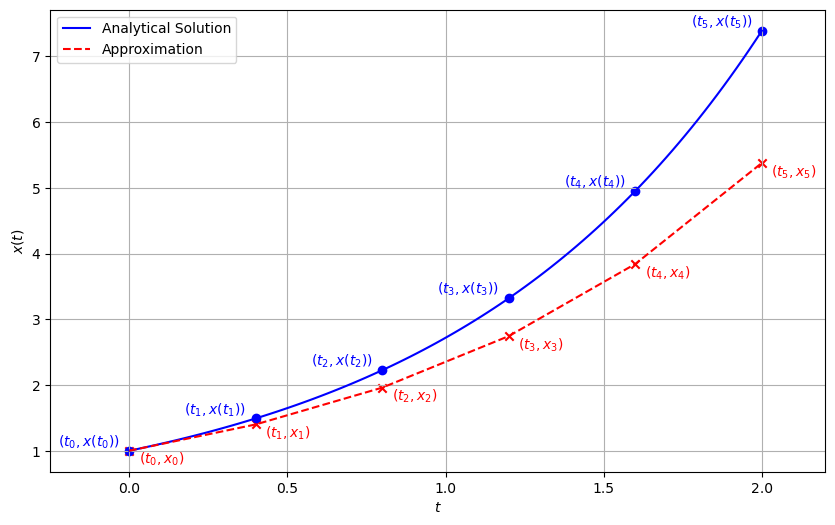

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(x_exact, y_exact, label='Analytical Solution', color='blue')
plt.plot(x_approx, y_approx, color='red', label='Approximation', linestyle='--')

offset = 0.03

# 近似点のラベルを追加（赤色、左側）
for i, (xi, yi) in enumerate(zip(x_approx, y_approx)):
    plt.scatter(xi, yi, marker='x', color='red')
    plt.text(xi+offset, yi, 
             fr'$(t_{i},x_{i}$)', 
             color='red', 
             verticalalignment='top', 
             horizontalalignment='left')

# 解析解のサンプリング点（丸）とラベルを追加（青色、左側）
for i, xi in enumerate(x_approx):
    yi_exact = np.exp(xi)
    plt.scatter(xi, yi_exact, marker='o', color='blue')

    plt.text(xi-offset, yi_exact,
             fr'$(t_{i},x(t_{i}))$',
             color='blue',
             verticalalignment='bottom',
             horizontalalignment='right')

plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.xlim(-0.25, 2.2)
plt.legend()
plt.grid(True)

良い近似とは青色の解析解に近い近似解を得ることであり，今日までに数多くのアルゴリズムが提案されている．